# Attendance Vs Perfomance: White Sox and Cubs Analysis

## Introduction

One way you could classify the people living in Chicago is by determining if they are Cubs or White Sox fans. There is a popular notion that the Cubs' ballpark, Wrigley Field, with its very trendy neighborhood, would always be full of fans regardless of the team's performance. Also, most of the tourists visiting Chicago have plans to attend a game at this historic ballpark.<br>
On the other hand, fans of the White Sox regard themselves as true baseball fans. This would mean that they would make an effort to go to a game only when there is some assurance that the game would have a good outcome.<br>
In this short project, I examined if attendance at each ballpark depends on team performance and how that dependency differs between the Cubs and the Sox.

## Data

For this analysis, I used publicly available datasets. In addition, I created additional variables (data engineering) so that it would be easier to visualize any correlations and relationships.

### NOTE: Since the White Sox moved to a new ballpark in 2003, I used data starting from this year.

The data can be downloaded from a baseball reference website:

* __[baseball-reference (Chicago Cubs)](https://www.baseball-reference.com/teams/CHC/attend.shtml)__
* __[baseball-reference (Chicago White Sox)](https://www.baseball-reference.com/teams/CHW/attend.shtml)__

Sample data from the baseball reference site:

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm

# read 2 datasets
dfC = pd.read_csv("..\\DataSets\\CubSox\\chicagoCubs.csv")
dfW = pd.read_csv("..\\DataSets\\CubSox\\chicagoWhite.csv")
dfC.head(7)

,Year,Tm,Lg,W,L,Finish,Playoffs,Attendance,Attend/G,Rank,Est. Payroll,PPF,BPF,Stadium
0,2019,Chicago Cubs,NL Central,84,78,3,NaN,3094865,38208,3rd of 15,$217805215,99,100,Wrigley Field
1,2018,Chicago Cubs,NL Central,95,68,2,Lost NLWC (1-0),3181089,38794,4th of 15,$205373881,103,104,Wrigley Field
2,2017,Chicago Cubs,NL Central,92,70,1,Lost NLCS (4-1),3199562,39501,4th of 15,$177210667,101,103,Wrigley Field
3,2016,Chicago Cubs,NL Central,103,58,1,Won WS (4-3),3232420,39906,4th of 15,$176097333,100,101,Wrigley Field
4,2015,Chicago Cubs,NL Central,97,65,3,Lost NLCS (4-0),2919122,36039,4th of 15,$115306610,97,98,Wrigley Field
5,2014,Chicago Cubs,NL Central,73,89,5,NaN,2652113,32742,6th of 15,$59800500,103,102,Wrigley Field
6,2013,Chicago Cubs,NL Central,66,96,5,NaN,2642682,32626,7th of 15,$67874166,103,102,Wrigley Field


#### Additional Variables

I created 4 additional variables to capture changes from previous years in win-loss record and attendance. Since the project investigates attendance and records, I removed all other variables and merged the two datasets.<br>
For clarity, I renamed and added the prefixes ‘Cubs’ and ‘WhiteSox’ to the remaining variables for ease of analysis.<br>
Below is a list of variables in the new dataset:<br>


* Year - calendar year.
* Cubs_Wins - number of wins by the Cubs for the selected calendar year.
* Cubs_Att - Cubs attendance (in ‘000) for the selected calendar year.
* WhiteSox_Wins - number of wins by the White Sox for the selected calendar year.
* WhiteSox_Att - White Sox attendance (in ‘000) for the selected calendar year.
* Cubs_Below500 - number of games below 500 for the Cubs
* WhiteSox_Below500 - number of games below 500 for the White Sox
* Cubs_Wins_YoY - change of wins from the previous year for the Cubs.
* WhiteSox_Wins_YoY - change of wins from the previous year for the White Sox.
* Cubs_Att_YoY - change of attendance from the previous year for the Cubs.
* WhiteSox_Att_YoY - change of attendance from the previous year for the White Sox.


In [11]:
colToKeep = ['Year', 'W','Attend/G']
dfC =  dfC[colToKeep]
dfW =  dfW[colToKeep]

dfC = dfC.rename(columns={'Attend/G': 'Cubs_Att', "W": "Cubs_Wins"})
dfW = dfW.rename(columns={'Attend/G': 'WhiteSox_Att', "W": "WhiteSox_Wins"})
dfC = dfC.set_index('Year')
dfW = dfW.set_index('Year')

# merge the datasets:
df = pd.merge(dfC, dfW, how='inner', left_index=True, right_index=True)

df['Cubs_Att'] = df['Cubs_Att']/1000
df['WhiteSox_Att'] = df['WhiteSox_Att']/1000

## 
df['Cubs_Below500'] = df['Cubs_Wins'] - 81
df['WhiteSox_Below500'] = df['WhiteSox_Wins'] - 81

df['Cubs_Wins_YoY'] = df['Cubs_Wins'].diff(periods=-1)
df['WhiteSox_Wins_YoY'] = df['WhiteSox_Wins'].diff(periods=-1)

df['Cubs_Att_YoY'] = df['Cubs_Att'].diff(periods=-1)
df['WhiteSox_Att_YoY'] = df['WhiteSox_Att'].diff(periods=-1)


Final dataset used for Analysis

In [12]:
df.head(7)

,Cubs_Wins,Cubs_Att,WhiteSox_Wins,WhiteSox_Att,Cubs_Below500,WhiteSox_Below500,Cubs_Wins_YoY,WhiteSox_Wins_YoY,Cubs_Att_YoY,WhiteSox_Att_YoY
Year,,,,,,,,,,
2019,84,38.208,72,20.622,3,-9,-11.0,10.0,-0.586,0.760
2018,95,38.794,62,19.862,14,-19,3.0,-5.0,-0.707,-0.255
2017,92,39.501,67,20.117,11,-14,-11.0,-11.0,-0.405,-1.442
2016,103,39.906,78,21.559,22,-3,6.0,2.0,3.867,-0.118
2015,97,36.039,76,21.677,16,-5,24.0,3.0,3.297,1.296
2014,73,32.742,73,20.381,-8,-8,7.0,10.0,0.116,-1.451
2013,66,32.626,63,21.832,-15,-18,5.0,-22.0,-2.964,-2.439


### Performance and Attendance Comparison for Both Teams

Before examining performance and attendance for both teams, I am going to show how the teams compare to each other.<br>
To compare, I created a set of three charts
* Attendance for both teams in (000). To emphasize the difference, the area between the two lines was made in different colors.
* Bar chart that indicates wins difference between the Cubs and White Sox.
* Difference in attendance in (000)


<IPython.core.display.Javascript object>


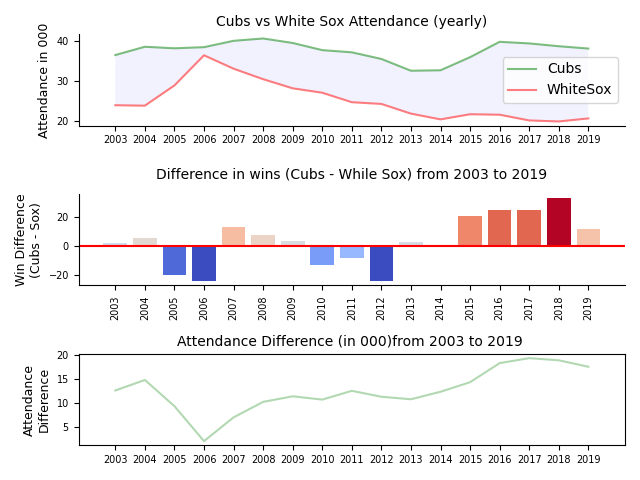

In [13]:

colourValuesNN = [x for x in df['Cubs_Wins'] - df['WhiteSox_Wins']]

cmap = plt.get_cmap('coolwarm')
norm = col.Normalize(vmin=min(colourValuesNN), vmax=max(colourValuesNN))
m = cm.ScalarMappable(norm=norm, cmap=cmap)

m.set_array([])


#####################################
plt.figure()
ax1 = plt.subplot(3, 1, 1)
plt.plot(df.index, df['Cubs_Att'],  color='g', alpha = 0.5, label = 'Cubs')
plt.plot(df.index, df['WhiteSox_Att'],  color='r', alpha = 0.5, label = 'WhiteSox')

# fill
plt.gca().fill_between(df.index, 
                       df['WhiteSox_Att'], df['Cubs_Att'], 
                       facecolor='blue', 
                       alpha=0.05)
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)

plt.ylabel('Attendance in ''000', fontsize='9')
plt.title('Cubs vs White Sox Attendance (yearly)', fontsize='10')
plt.legend()

# bar plot
ax2 = plt.subplot(3, 1, 2, sharex=ax1)

bars = plt.bar(df.index, df['Cubs_Wins'] - df['WhiteSox_Wins'], color = m.to_rgba(colourValuesNN))


plt.axhline(y=0, color='r')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
#plt.xticks(locs, labels, rotation ='vertical', fontsize='7')

ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Difference in wins (Cubs - While Sox) from 2003 to 2019', fontsize='10', y=1.08)
plt.ylabel('Win Difference\n(Cubs - Sox)', fontsize='9')
#cbar = plt.colorbar(m, orientation="horizontal")
# Turn off some plot rectangle spines
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]

# last image
# difference in attendance

ax2 = plt.subplot(3, 1, 3, sharex=ax1)
plt.plot(df.index, df['Cubs_Att'] - df['WhiteSox_Att'],  color='g', alpha = 0.3, label = 'Cubs')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
plt.title('Attendance Difference (in ''000)from 2003 to 2019 ', fontsize='10')
plt.ylabel('Attendance\nDifference', fontsize='9')


plt.tight_layout()

plt.show()



From the graph above, I could make the following observations:
* Cubs attendance is always higher than White Sox attendance.
* Attendance for Cubs is relatively constant, and the changes over the years are negligible. On the other hand, white Sox attendance spiked once, around the time when the club won the World Series for the first time in over 100 years.
* When looking at the difference in performance (difference in wins), I could observe that the attendance difference is tied closely to the performance of both teams. From 2015 to 2018, when the Cubs outperformed the White Sox, the attendance difference was significant. On the other hand, when the Sox were very competitive (2005-2006), the attendance for both teams was comparable.
* The third graph shows that attendance for both clubs differs significantly over the years. Knowing that attendance for the Cubs is relatively constant, the Sox attendance is the factor for the resulting divergence.



### White Sox - Performance vs. Attendance Analysis


To investigate the relationship between performance and attendance, I created a set of 4 charts for each team.  
* A line chart with attendance in ‘000s over the years.
* A bar chart showing (win-loss) difference for each year.
* A bar chart with a change in wins compared to a previous year. The graph will show if the team is improving year over year.
* A bar chart with change in attendance year over year. This will help us to determine if the attendance rose or declined as compared with the previous year.

<IPython.core.display.Javascript object>


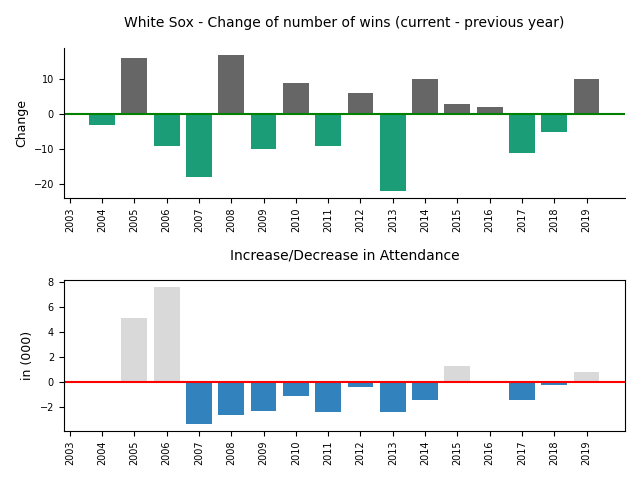

In [15]:
df.columns
colourValuesNN = [0 if x < 0 else 1 for x in df['WhiteSox_Wins_YoY']]
cmap = plt.get_cmap('Dark2')
norm = col.Normalize(vmin=min(colourValuesNN), vmax=max(colourValuesNN))
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
    

plt.figure()
# difference in wins
# bar plot
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
ax1 = plt.subplot(2, 1, 1)
bars = plt.bar(df.index, df['WhiteSox_Wins_YoY'], color = m.to_rgba(colourValuesNN)) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='g')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('White Sox - Change of number of wins (current - previous year)', fontsize='10', y=1.08)
plt.ylabel('Change', fontsize='9')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]


colourValuesNNx = [0 if x < 0 else 1 for x in df['WhiteSox_Att_YoY']]
cmapx = plt.get_cmap('tab20c')
normx = col.Normalize(vmin=min(colourValuesNNx), vmax=max(colourValuesNNx))
mx = cm.ScalarMappable(norm=normx, cmap=cmapx)
mx.set_array([])
  

# difference in attendance
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
bars = plt.bar(df.index, df['WhiteSox_Att_YoY'], color = mx.to_rgba(colourValuesNNx)) # color='b' ) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='r')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Increase/Decrease in Attendance', fontsize='10', y=1.08)
plt.ylabel('in (000)', fontsize='9')

plt.tight_layout()

plt.show()


<IPython.core.display.Javascript object>


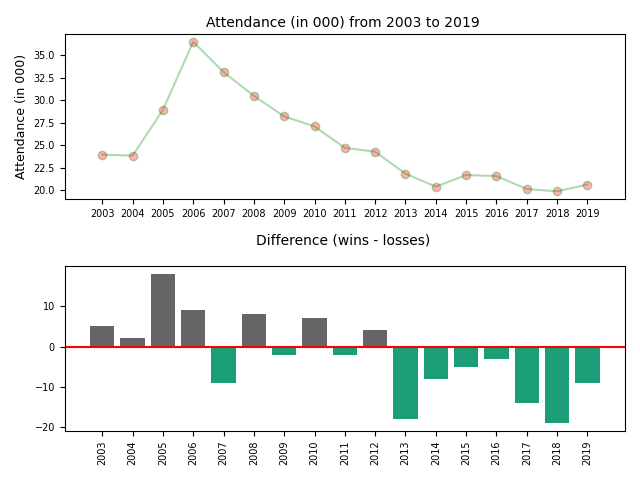

In [19]:
df.columns
plt.figure()
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
ax1 = plt.subplot(2, 1, 1)

plt.plot(df.index, df['WhiteSox_Att'],  color='g', alpha = 0.3, label = 'White Sox',  marker='o', mfc='red')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
plt.title('Attendance (in ''000) from 2003 to 2019 ', fontsize='10')
plt.ylabel('Attendance (in ''000)', fontsize='9')


colourValuesNNx = [0 if x < 0 else 1 for x in df['WhiteSox_Below500']]
cmapx = plt.get_cmap('tab20c')
normx = col.Normalize(vmin=min(colourValuesNNx), vmax=max(colourValuesNNx))
mx = cm.ScalarMappable(norm=normx, cmap=cmapx)
mx.set_array([])

# difference in attendance
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
bars = plt.bar(df.index, df['WhiteSox_Below500'], color = m.to_rgba(colourValuesNNx) ) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='r')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Difference (wins - losses) ', fontsize='10', y=1.08)
plt.ylabel('', fontsize='9')

plt.tight_layout()

plt.show()



#### The White Sox Analysis
* I could notice that the attendance for the White Sox becomes constant (around 20,000) regardless of performance (years 2014 to 2019). For those years, the team did not have a single winning record at the end of the season. This would indicate that there are around 20,000 ‘hardcore fans’ who would attend the games regardless of the team’s performance 
* I could also observe that attendance spiked to over 35k when the team’s performance was exceptional (2005-2006). 
* There is a slow but steady decline in attendance from 2007-2013. It is a little surprising that there were still quite large crowds at the ballpark, even if the team was not very competitive.
* Year 2008 shows that even with a very competitive team, it is not enough for any increase in attendance.
* Altogether, the results show that the White Sox would need to have a successful team for at least a year before any increase in attendance. 

### The Cubs - Performance vs. Attendance Analysis
I replicated the same analysis as for the White Sox.

<IPython.core.display.Javascript object>


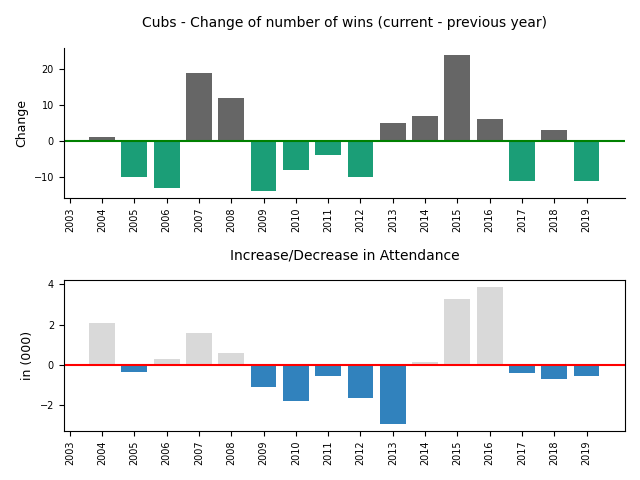

In [20]:
df.columns
colourValuesNN = [0 if x < 0 else 1 for x in df['Cubs_Wins_YoY']]
cmap = plt.get_cmap('Dark2')
norm = col.Normalize(vmin=min(colourValuesNN), vmax=max(colourValuesNN))
m = cm.ScalarMappable(norm=norm, cmap=cmap)
m.set_array([])
    

plt.figure()
# difference in wins
# bar plot
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
ax1 = plt.subplot(2, 1, 1)
bars = plt.bar(df.index, df['Cubs_Wins_YoY'], color = m.to_rgba(colourValuesNN)) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='g')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Cubs - Change of number of wins (current - previous year)', fontsize='10', y=1.08)
plt.ylabel('Change', fontsize='9')
[plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]


colourValuesNNx = [0 if x < 0 else 1 for x in df['Cubs_Att_YoY']]
cmapx = plt.get_cmap('tab20c')
normx = col.Normalize(vmin=min(colourValuesNNx), vmax=max(colourValuesNNx))
mx = cm.ScalarMappable(norm=normx, cmap=cmapx)
mx.set_array([])
  

# difference in attendance
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
bars = plt.bar(df.index, df['Cubs_Att_YoY'], color = mx.to_rgba(colourValuesNNx)) # color='b' ) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='r')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Increase/Decrease in Attendance', fontsize='10', y=1.08)
plt.ylabel('in (000)', fontsize='9')

plt.tight_layout()

plt.show()


<IPython.core.display.Javascript object>


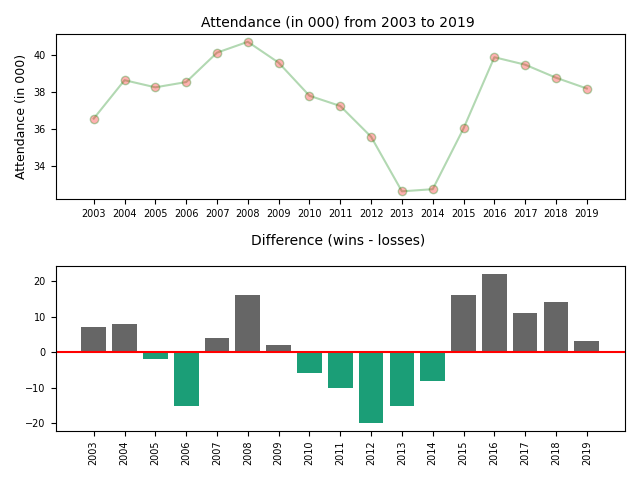

In [21]:
plt.figure()
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
ax1 = plt.subplot(2, 1, 1)

plt.plot(df.index, df['Cubs_Att'],  color='g', alpha = 0.3, label = 'White Sox',  marker='o', mfc='red')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
ax.tick_params(axis="x", labelsize=7)
plt.title('Attendance (in ''000) from 2003 to 2019 ', fontsize='10')
plt.ylabel('Attendance (in ''000)', fontsize='9')


colourValuesNNx = [0 if x < 0 else 1 for x in df['Cubs_Below500']]
cmapx = plt.get_cmap('tab20c')
normx = col.Normalize(vmin=min(colourValuesNNx), vmax=max(colourValuesNNx))
mx = cm.ScalarMappable(norm=normx, cmap=cmapx)
mx.set_array([])

# difference in attendance
ax2 = plt.subplot(2, 1, 2, sharex=ax1)
bars = plt.bar(df.index, df['Cubs_Below500'], color = m.to_rgba(colourValuesNNx) ) #df['CW'] - df['WW']) #, color = m.to_rgba(colourValuesNN))
plt.axhline(y=0, color='r')
plt.xticks(df.index, df.index, rotation ='vertical', fontsize='7')
ax = plt.gca()
ax.tick_params(axis="y", labelsize=7)
plt.title('Difference (wins - losses) ', fontsize='10', y=1.08)
plt.ylabel('', fontsize='9')

plt.tight_layout()

plt.show()


#### Cubs Analysis
* Contrary to popular belief, and surprising for me, Cubs attendance declines when the team is not competitive. From 2010 to 2014, attendance decline corresponded to a decline in performance.
* What is different from the White Sox decline during non-competitive years is that for the Cubs, the attendance fluctuates by low single-digit numbers, while for the White Sox, the decline was very significant (close to 15,000).
* It takes only one or two good years for attendance to increase by a lot.

### Analysis of Correlations
Another way to investigate the relationship between all the variables related to attendance and performance is by investigating correlations.



#### Cubs Correlation Analysis


In [23]:
colToKeep = ['Cubs_Wins', 'Cubs_Att','Cubs_Below500', 'Cubs_Wins_YoY', 'Cubs_Att_YoY']
dfC =  df[colToKeep]
dfC = dfC.drop(2003)
dfC.corr()


,Cubs_Wins,Cubs_Att,Cubs_Below500,Cubs_Wins_YoY,Cubs_Att_YoY
Cubs_Wins,1.000000,0.593004,1.000000,0.456462,0.683077
Cubs_Att,0.593004,1.000000,0.593004,-0.107437,0.370397
Cubs_Below500,1.000000,0.593004,1.000000,0.456462,0.683077
Cubs_Wins_YoY,0.456462,-0.107437,0.456462,1.000000,0.573593
Cubs_Att_YoY,0.683077,0.370397,0.683077,0.573593,1.000000


#### White Sox Correlation Analysis

In [24]:
colToKeep = ['WhiteSox_Wins', 'WhiteSox_Att','WhiteSox_Below500', 'WhiteSox_Wins_YoY', 'WhiteSox_Att_YoY']
dfW =  df[colToKeep]
dfW = dfW.drop(2003)
dfW.corr()

,WhiteSox_Wins,WhiteSox_Att,WhiteSox_Below500,WhiteSox_Wins_YoY,WhiteSox_Att_YoY
WhiteSox_Wins,1.000000,0.619805,1.000000,0.573437,0.510193
WhiteSox_Att,0.619805,1.000000,0.619805,-0.067263,0.332065
WhiteSox_Below500,1.000000,0.619805,1.000000,0.573437,0.510193
WhiteSox_Wins_YoY,0.573437,-0.067263,0.573437,1.000000,0.245012
WhiteSox_Att_YoY,0.510193,0.332065,0.510193,0.245012,1.000000



Analysis of correlation coefficients confirmed our findings.
* For both teams, there is a correlation between variables related to attendance and variables related to performance.
* As expected already (based on inspecting the graphs), the correlation is much stronger for the White Sox.



# Conclusion


# Conclusion
The analysis showed that both teams suffer a decline in attendance when the team has a losing record. So, the notion that the Cubs' ballpark will always be full regardless of attendance is not true.<br>
### But….
The decline in attendance for the Cubs was very low (in mid-single digits) when the team was well below 500. On the other hand, attendance for the White Sox declined by close to **50%** when the team underperformed.<br>
So, there is little truth in the statement that the Cubs ballpark is a tourist attraction with baseball being just a bonus. 

